In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# About the data

* Data consists of 10000 observations and 9 variables for the calender year 2024.
* Variables: Date ,Time ,Menu item , Category , Quantity purchased ,Price per item , Revenue , Payment method , Customer type
* Currency: 


In [319]:
df= pd.read_excel(r"C:\Users\karab\Videos\JOB_Projects\Italian_resteurant_dataset.xlsx")
data=df.copy()
data.head()

,Date,Time,Menu Item,Category,Quantity,Price (per item),Revenue,Payment Method,Customer Type
0,2024-11-23,03:48 AM,Margherita Pizza,Main Course,3,10.0,30.0,Credit Card,Dine-In
1,2024-03-12,03:29 AM,Caprese Salad,Appetizer,1,8.0,8.0,Mobile Payment,Takeaway
2,2024-01-17,01:01 AM,Tiramisu,Dessert,2,6.5,13.0,Credit Card,Delivery
3,2024-11-04,12:54 AM,Caprese Salad,Appetizer,2,8.0,16.0,Mobile Payment,Delivery
4,2024-12-25,06:36 PM,Gelato,Dessert,2,4.5,9.0,Cash,Delivery


In [382]:
print( df.describe(include='all') )
print( df.info() )

              Date      Time Menu Item     Category      Quantity  \
count        10000     10000     10000        10000  10000.000000   
unique         365      1438        10            3           NaN   
top     2024-09-14  08:48 PM  Tiramisu  Main Course           NaN   
freq            47        17      1052         4035           NaN   
mean           NaN       NaN       NaN          NaN      2.978000   
std            NaN       NaN       NaN          NaN      1.420041   
min            NaN       NaN       NaN          NaN      1.000000   
25%            NaN       NaN       NaN          NaN      2.000000   
50%            NaN       NaN       NaN          NaN      3.000000   
75%            NaN       NaN       NaN          NaN      4.000000   
max            NaN       NaN       NaN          NaN      5.000000   

        Price (per item)       Revenue Payment Method Customer Type  
count       10000.000000  10000.000000          10000         10000  
unique               NaN       

In [323]:
# Fix dates

data['Date'] = pd.to_datetime(data['Date'])
data['AM_PM'] = data['Time'].str.extract(r'\b(AM|PM)\b')
data['Months'] = data['Date'].dt.month_name()

In [325]:
data.isnull().sum()

Date                0
Time                0
Menu Item           0
Category            0
Quantity            0
Price (per item)    0
Revenue             0
Payment Method      0
Customer Type       0
AM_PM               0
Months              0
dtype: int64

# Revenue insights

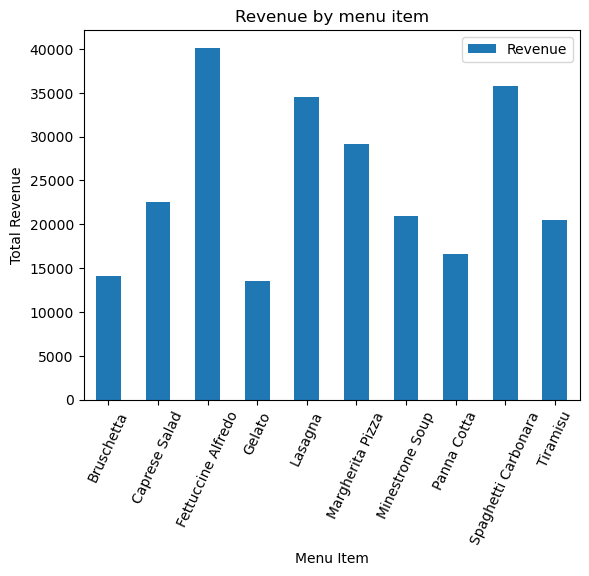

In [341]:
data['Date'].dtypes

data[['Menu Item','Revenue']].groupby('Menu Item').sum().plot(kind='bar',
   title= "Revenue by menu item")
plt.ylabel('Total Revenue')
plt.xticks(rotation=65)
plt.show()

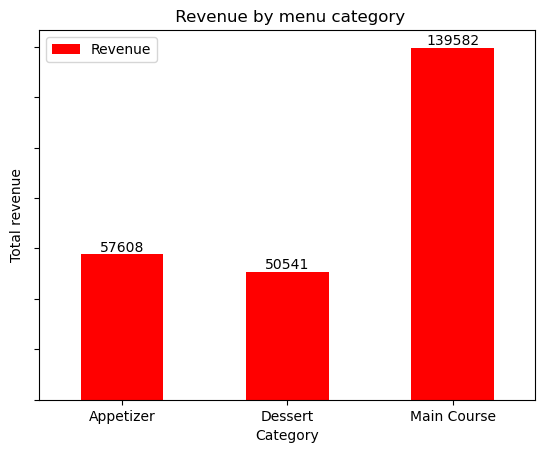

In [372]:
plot1 = data[['Category','Revenue']].groupby('Category').sum().plot( kind='bar',color='red',title=" Revenue by menu category")
for container in plot1.containers:
    plot1.bar_label(container, label_type='edge')

plt.ylabel('Total revenue')
plt.xticks(rotation=0)
plot1.set_yticklabels([])
plt.show()

# Customer prefences

In [331]:
# Payment method preference
counts = []
for name in data['Payment Method'].unique():
    count = data[data['Payment Method']==name]['Payment Method'].count()
    counts.append((name,count))

pd.DataFrame(counts,columns=['Payment Method','Counts']).sort_values("Counts")

,Payment Method,Counts
0,Credit Card,3287
1,Mobile Payment,3339
2,Cash,3374


In [333]:
# Service preference

data.groupby('Customer Type')['Customer Type'].count().reset_index(name='Count')
    

,Customer Type,Count
0,Delivery,3278
1,Dine-In,3353
2,Takeaway,3369


In [337]:
# Time of purchase preference

data.groupby("AM_PM")['AM_PM'].count().reset_index(name='Counts')

,AM_PM,Counts
0,AM,4887
1,PM,5113


# ### e



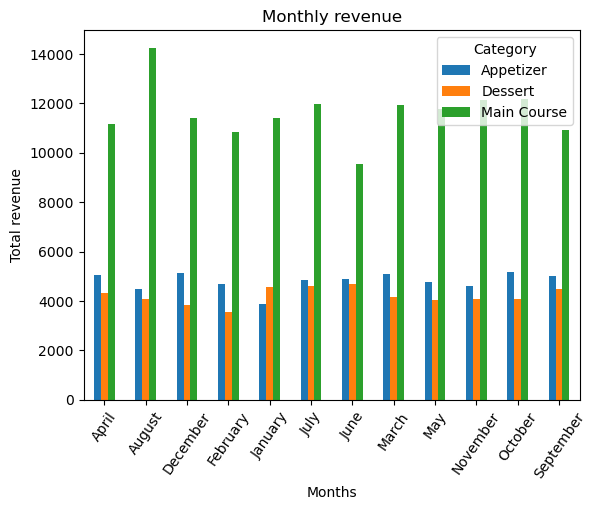

In [357]:
subset=data[['Months', 'Category', 'Revenue']].groupby(['Months', 'Category']).sum().reset_index()
subset.pivot(index='Months',columns='Category',values='Revenue').plot(kind='bar', title= "Monthly revenue")
plt.ylabel('Total revenue')
plt.xticks(rotation=55)
plt.show()

# Insights

* Food items from the Main course category generates more revenue than the Appetizer and Dessert categories, with Dessert being the least generating among the three
categories
* Fettuccine Alfredo and Toramisu are the most liked food items by customers, Caprese Salad is the
least favourite
* Fettuccine Alfredo ,Spaghetti Carbonara and Lasagna are the top three revenue generating food items,
Gelato and Panna Cotta generate way less revenue
* Most customers buy more in the Afternoon or Evening (PM) than they do in the Morning (AM), hence
the Restaurant generates more revenue in post meridiem (PM)
* Most customer prefer paying cash compared to the likes of Credit card and Mobile payment
* Most customers prefer Takeaways than Delivery and eating in-store
* August and October generated the most revenue, with June and February generating lowest revenue
* Main courses are key for achieving high revenue — especially when customers order in larger quantities
* Appetizers and desserts almost never lead to high revenue on their own
* Promotions that encourage bulk orders on main courses (e.g. family meals, combos) could significantly boost revenue        